In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models_ricci'
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Ricci'
EXPERIMENT_SESSION_UUID = 'd6a4d686-4369-4bca-95c8-7be5d0740b15'
SENSITIVE_ATTRS = ['Race']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [11]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [12]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(342, 19)

In [13]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,Model_Init_Seed,Fair_Intervention_Params_Lst,Intervention_Param,Race_dis,Race_priv,overall,Test_Set_Index
0,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:50:29.322,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.0],0.0,0.181818,0.411765,0.282051,0
1,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:52:13.429,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.4],0.4,0.181818,0.411765,0.282051,0
2,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:53:03.954,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.7],0.7,0.181818,0.411765,0.282051,0
72,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:50:29.322,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.0],0.0,0.973509,0.973509,0.973509,0
73,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:52:13.429,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.4],0.4,0.972996,0.972996,0.972996,0
74,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:53:03.954,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.7],0.7,0.977829,0.977829,0.977829,0
144,F1,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:50:29.322,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.0],0.0,0.307692,0.583333,0.440000,0
145,F1,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:52:13.429,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.4],0.4,0.307692,0.583333,0.440000,0
146,F1,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:53:03.954,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.7],0.7,0.307692,0.583333,0.440000,0
216,FNR,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Ricci,200,OK,2023-08-06 20:50:29.322,d6a4d686-4369-4bca-95c8-7be5d0740b15,Exp_iter_1,100,100,[0.0],0.0,0.000000,0.000000,0.000000,0


In [14]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [16]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [17]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [18]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

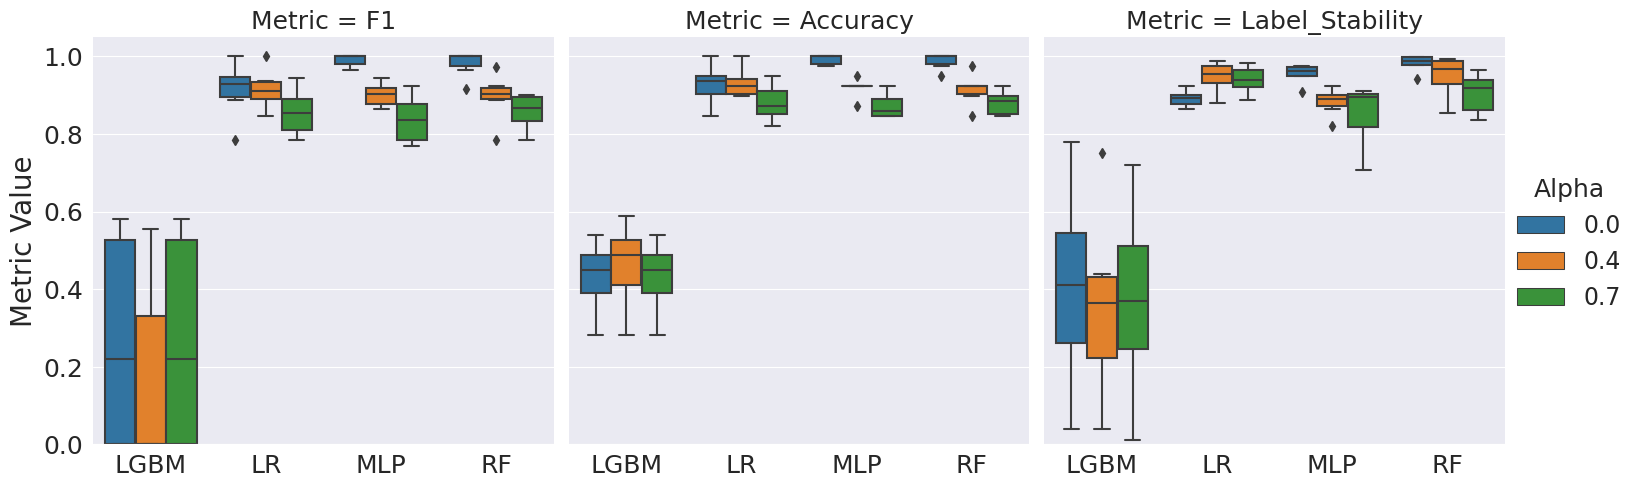

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.0, 1.05),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

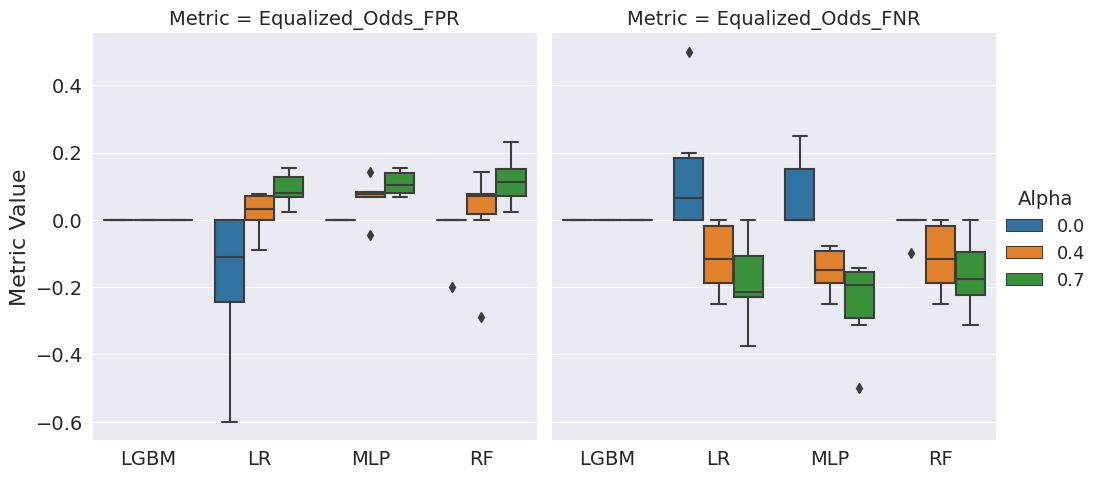

In [24]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='Race',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 3. Scatter plots.

In [25]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='Race',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)